In [1]:
import astropy.units as u
import astropy.wcs
import h5py
import matplotlib.pyplot as plt
import ndcube
from ndcube import NDCube
import numpy as np
#from synthesizAR.analysis import make_slope_map
from synthesizAR.instruments.util import extend_celestial_wcs
import warnings
import numpy as np
import sunpy
from sunpy.map import Map
from astropy.io import fits 
import glob
import os
from matplotlib import colors
%matplotlib inline

In [2]:
def single_histo(frequency, channels, ax, lag_range): # frequency can be high, inter, low , channels are in form #_# , em is either high_em, inter_em, or low_em
    #read in em map
    em = sunpy.map.Map('/Users/avathienel/NASA/synthetic-observables-paper-models/paper/data/'+frequency+'_frequency/'+frequency+'_slope_map.fits')
    #read in r squared values
    r_val = sunpy.map.Map('/Users/avathienel/NASA/synthetic-observables-paper-models/paper/data/'+frequency+'_frequency/'+frequency+'_r_squared_map.fits')
    em.mask = r_val.data < 0.75 
    #read in correlation
    corr = sunpy.map.Map('/Users/avathienel/NASA/synthetic-observables-paper-models/paper/data/'+frequency+'_frequency/correlation_'+channels+'.fits')
    #read in timelag
    lag = sunpy.map.Map('/Users/avathienel/NASA/synthetic-observables-paper-models/paper/data/'+frequency+'_frequency/timelag_'+channels+'.fits')
    lag.mask = corr.data < 0.1
    #define mask
    combined_mask = em.mask | lag.mask
    #apply combined mask
    y_coords = em.data[~combined_mask] 
    x_coords = lag.data[~combined_mask]
    #plot
    #fig, ax = plt.subplots(1,2)
    #ax.grid
    ax.set_xlabel('timelag')
    ax.set_ylabel('alpha')
    #making slope cut off at 15, and timelag at +/-15000 while real is probably 35 and +/- 20000
    ax.hist2d(x_coords, y_coords, bins = [5,60], range = [lag_range, [1, 10]], 
              norm=colors.LogNorm()) #replacing +/- 15000
    #return fig

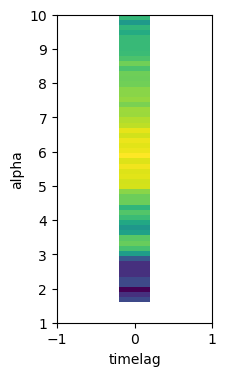

In [3]:
#example
fig, ax = plt.subplots(figsize = [2,4])
high_94_171 = single_histo('high', '94_171', ax, [-1, 1])

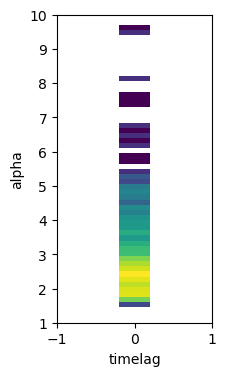

In [4]:
#example
fig, ax2 = plt.subplots(figsize = [2,4])
high_94_171 = single_histo('low', '94_171', ax2, [-1, 1])

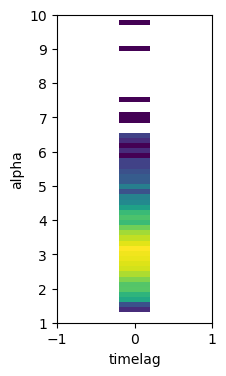

In [5]:
#example
fig, ax3 = plt.subplots(figsize = [2,4])
high_94_171 = single_histo('intermediate', '94_171', ax3, [-1, 1])

In [6]:
def compare_freq(channels,ax, lag_range):
    #create 3 single histogram which shows all three frequencies of a single channel
    high_plt = single_histo('high', channels, ax[0], lag_range)
    ax[0].set_title('high freq.'+channels)
    inter_plt = single_histo('intermediate', channels, ax[1], lag_range)
    ax[1].set_title('inter freq.'+channels)
    low_plt = single_histo('low', channels, ax[2], lag_range)
    ax[2].set_title('low freq.'+channels)
    #adjust display spacing
    fig.subplots_adjust(left=0.1, right=0.8, bottom=0.4, top=0.9, hspace=0.3)
    fig.suptitle('Channel Pair: '+channels)

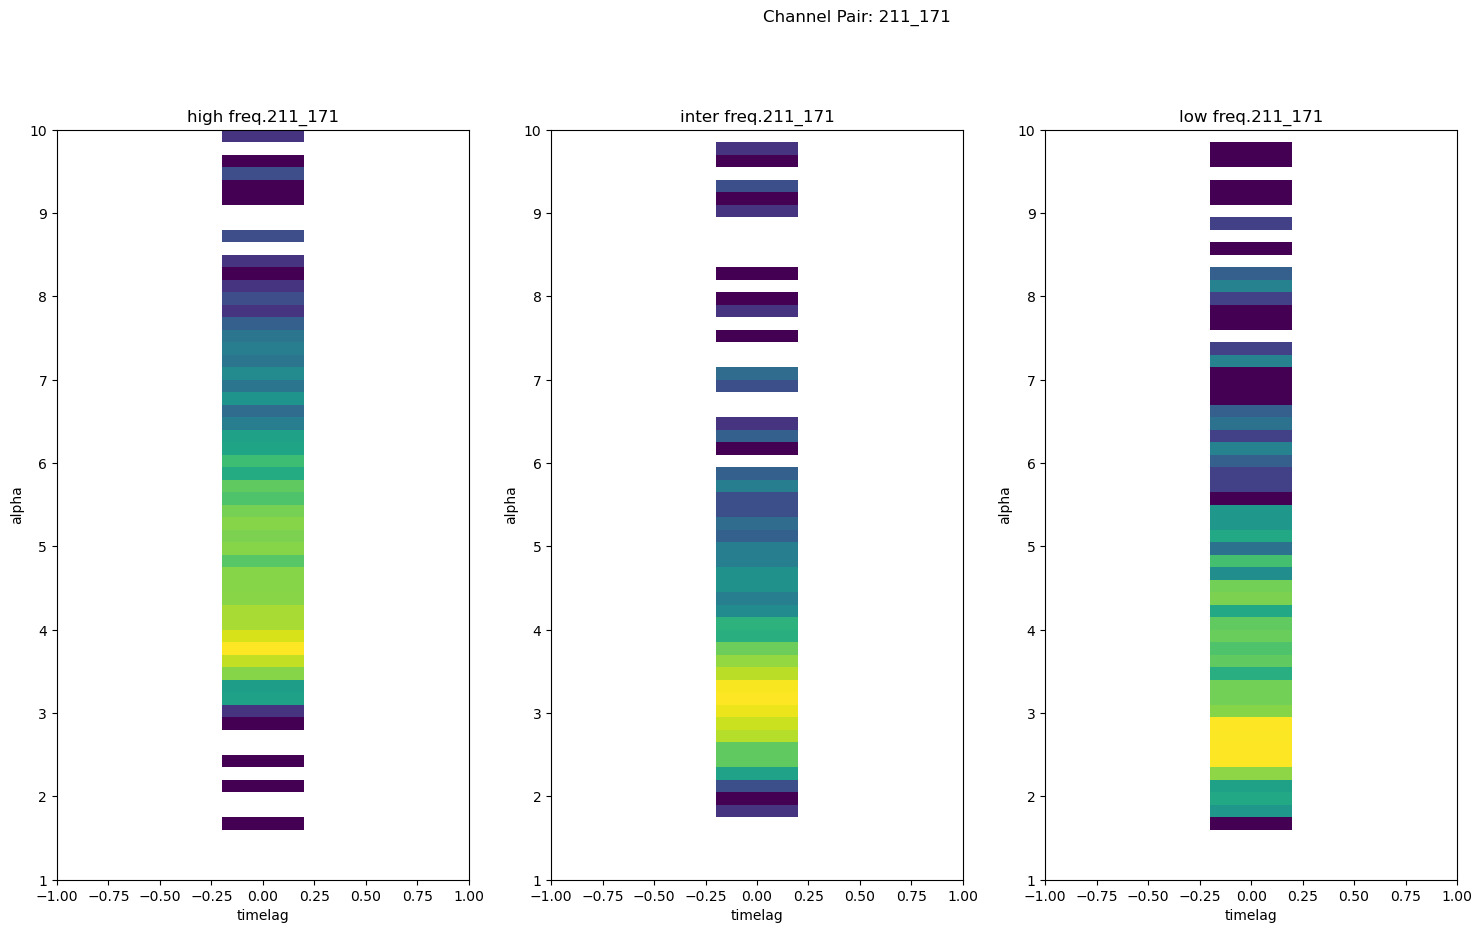

In [7]:
fig, ax1 = plt.subplots(1,3, figsize = (20,15))
compare_freq('211_171', ax1, [-1, 1])

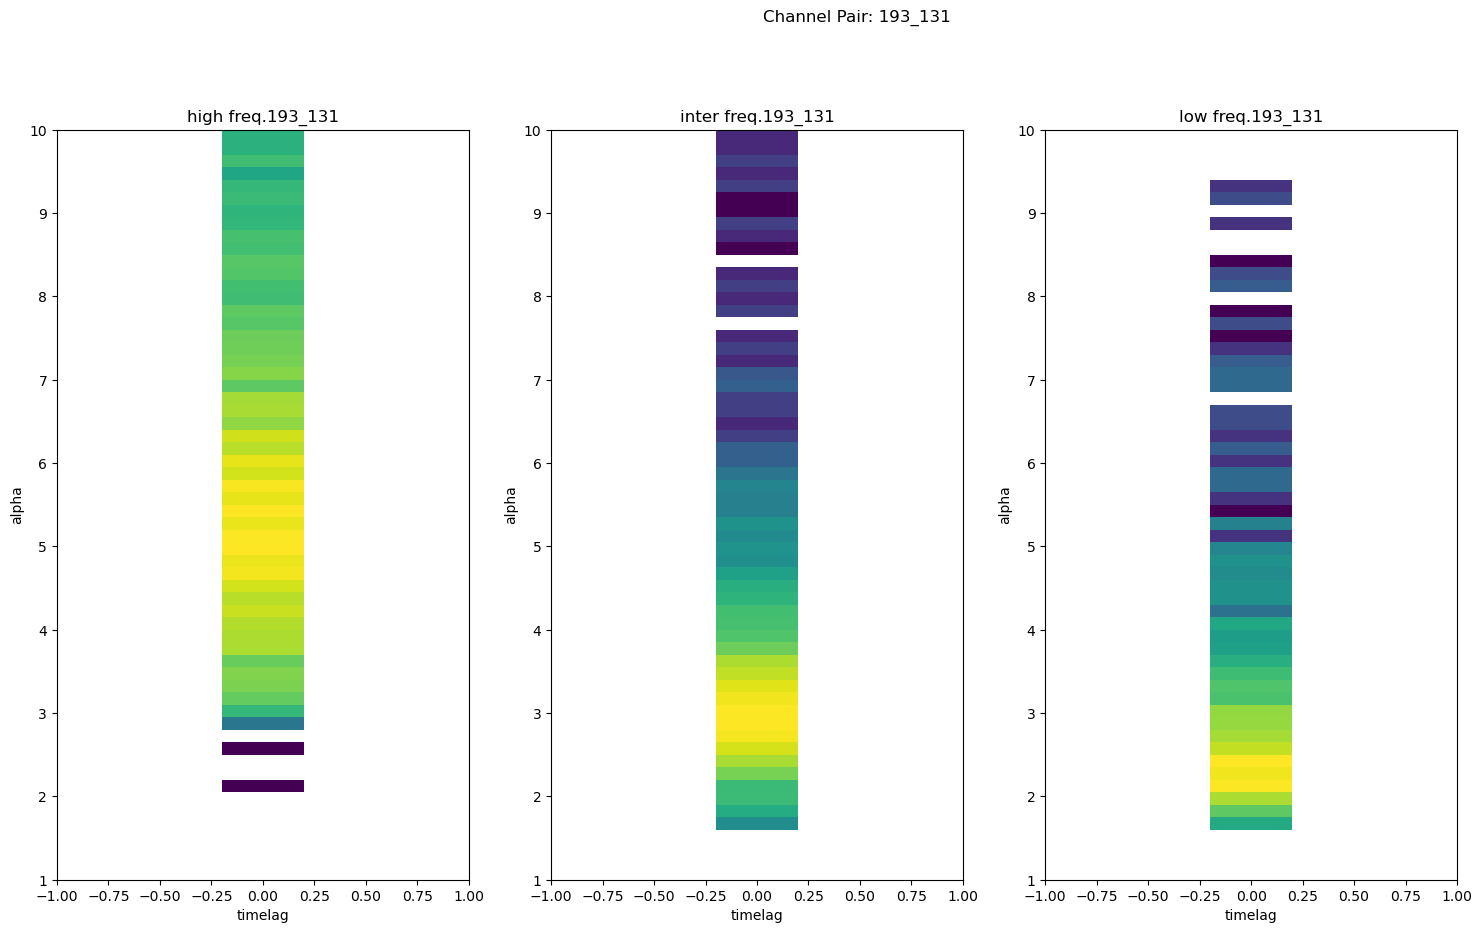

In [8]:
fig, ax = plt.subplots(1,3, figsize = (20,15))
compare_freq('193_131', ax, [-1, 1])

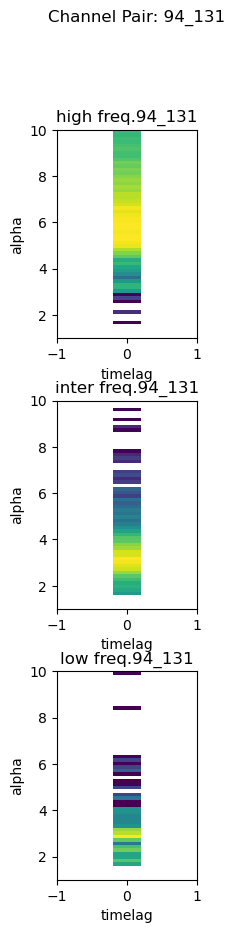

In [9]:
fig, ax = plt.subplots(3,1, figsize = (2,15))
compare_freq('94_131', ax, [-1, 1])

In [13]:
def compare_lags(lag_list,lag_range): #list of channel pairs
    #create plots data will be shown in
    fig, axs = plt.subplots(len(lag_list), 3, figsize = (30, 100)) #(35, 6*(len(lag_list))))
    #displays frequency histograms for any channels next to eachother
    for i in range(len(lag_list)):
        compare_freq(lag_list[i], axs[i,:],lag_range)
    fig.suptitle('Time Lag Comparisons:',  x=0.3, fontsize=20)
    #adjust display spacing
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.6, top=0.95, hspace=0.95)
    #fig.savefig('/Users/avathienel/NASA/Frequency_Comparisions/all_zero_lag.pdf')

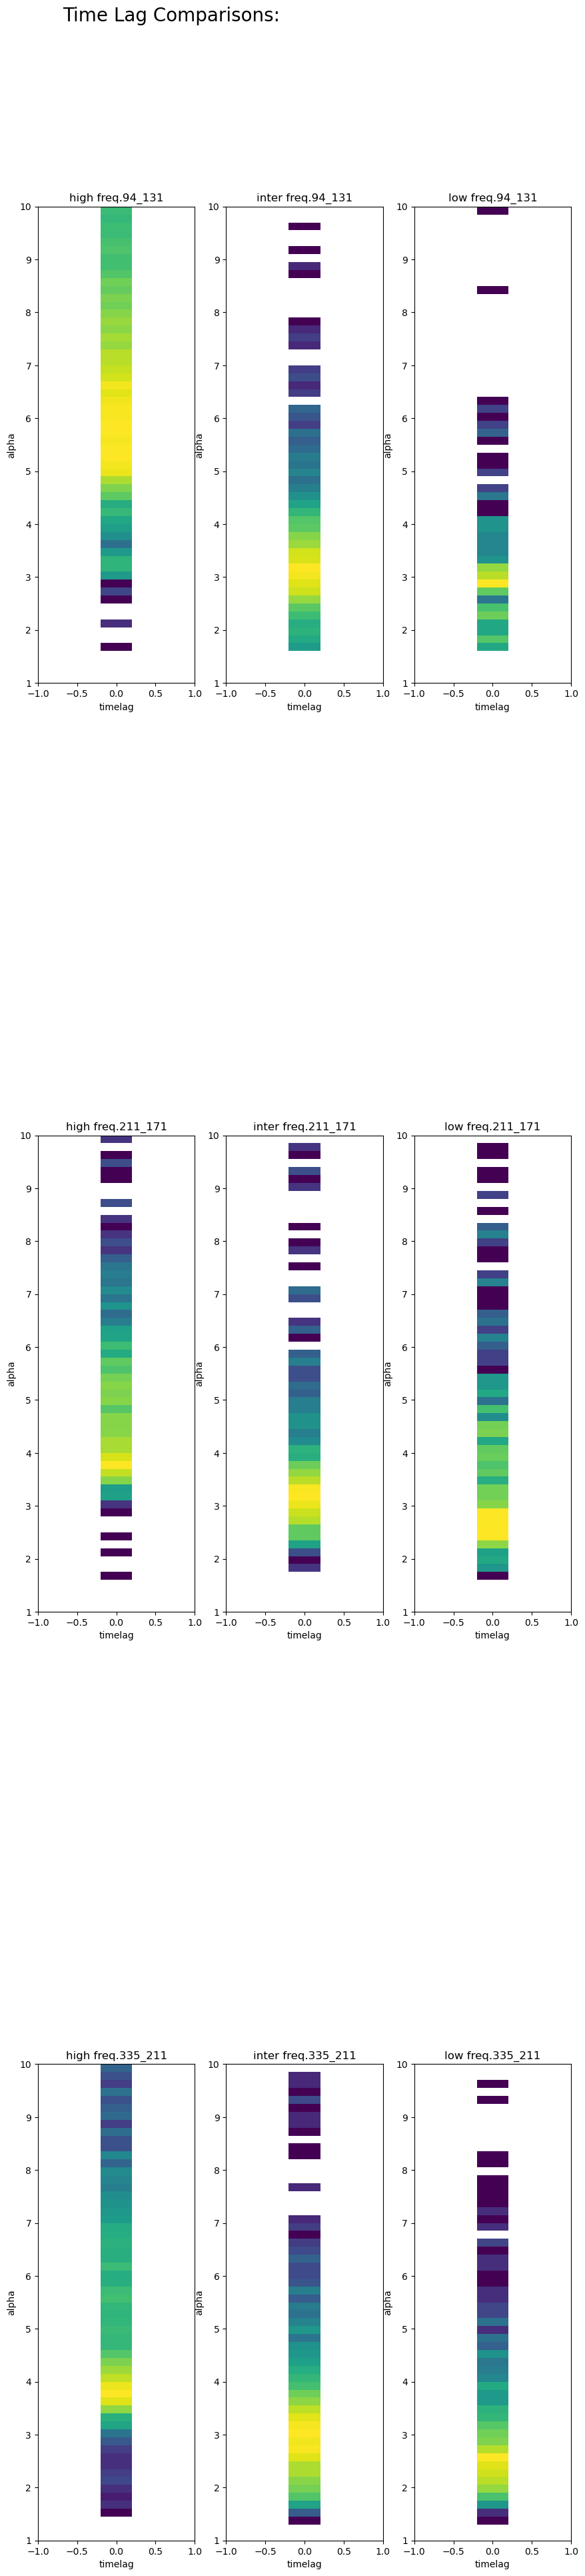

In [11]:
#example
compare_lags(['94_131', '211_171', '335_211'], [-1, 1])

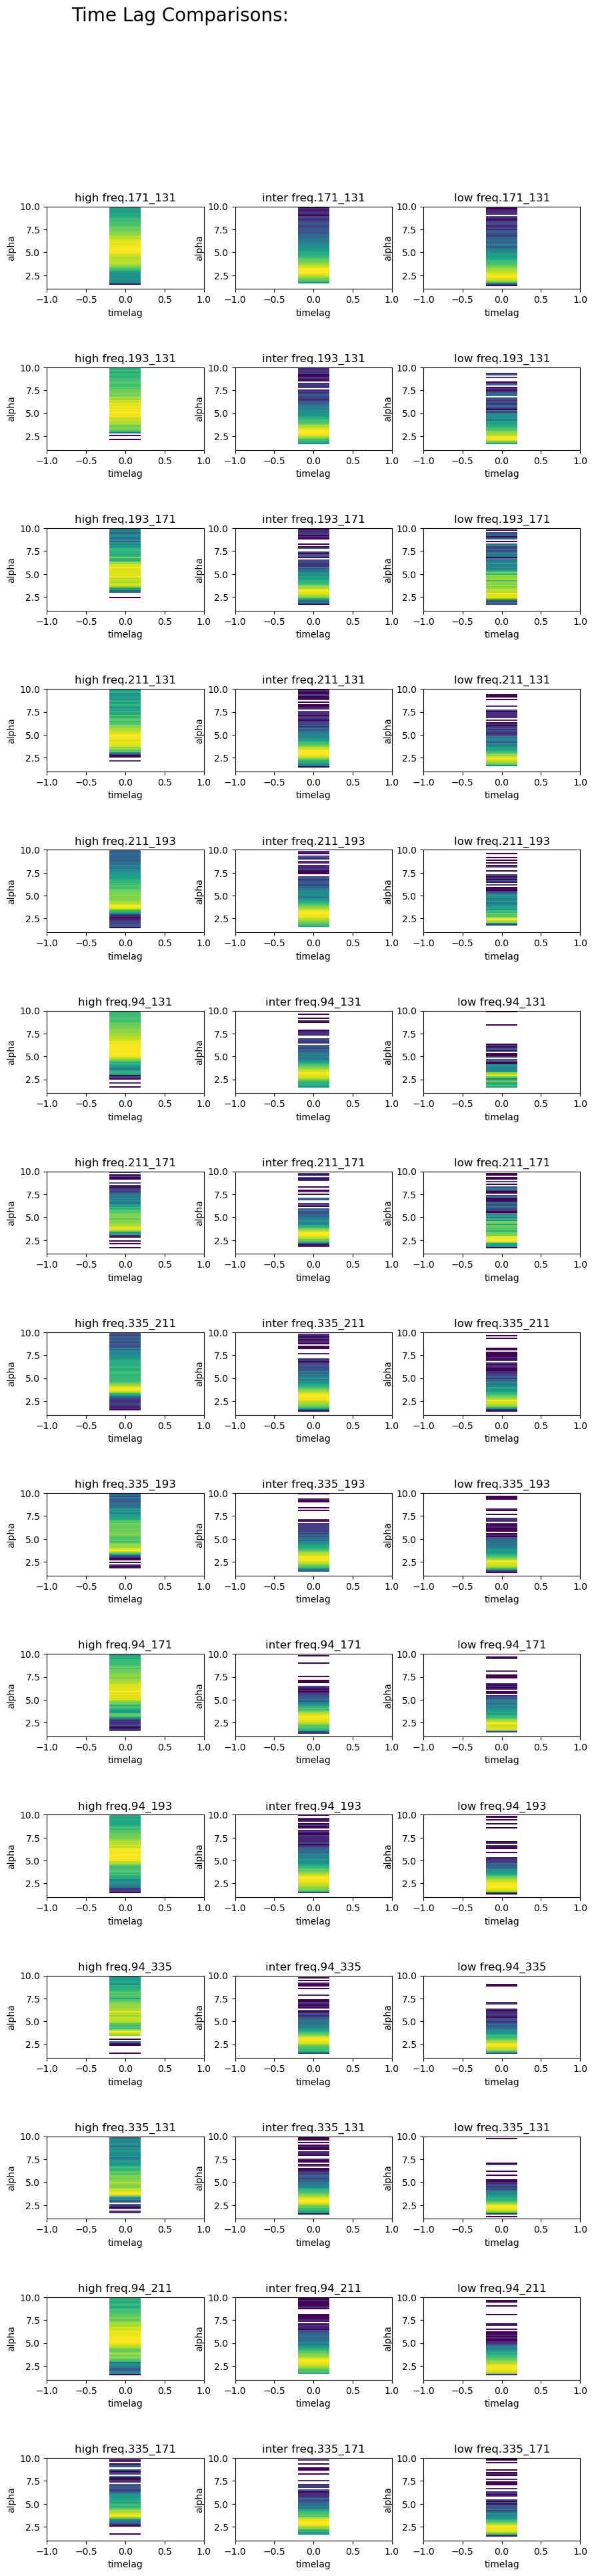

In [14]:
compare_lags(['171_131', '193_131', '193_171', '211_131', '211_193', '94_131', '211_171', '335_211', '335_193', '94_171', '94_193', '94_335', '335_131', '94_211', '335_171'], [-1, 1])